In [1]:
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
PATH = r'C:\Users\vivek\Desktop\face-data'

In [4]:
image_generator = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)
train_dataset = image_generator.flow_from_directory(batch_size = 32,
                                                   directory = PATH,
                                                   shuffle = True,
                                                   target_size = (224, 224),
                                                   subset = 'training',
                                                   class_mode = 'categorical')
test_dataset = image_generator.flow_from_directory(batch_size = 32,
                                                  directory = PATH,
                                                  shuffle = True,
                                                  target_size = (224, 224),
                                                  subset = 'validation',
                                                  class_mode = 'categorical')

Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


In [5]:
from tensorflow.keras.applications import MobileNetV2

In [7]:
first_model = MobileNetV2(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

9412608/9406464 [==============================] - 117s 12us/step


In [21]:
def fc(first_Model):
    second_model = first_Model.output
    second_model = tf.keras.layers.GlobalAveragePooling2D()(second_model)
    second_model = tf.keras.layers.Dense(1024,activation='relu')(second_model)
    second_model = tf.keras.layers.Dense(1024,activation='relu')(second_model)
    second_model = tf.keras.layers.Dense(512,activation='relu')(second_model)
    second_model = tf.keras.layers.Dense(2,activation='softmax')(second_model)
    return second_model

In [22]:
from tensorflow.keras.models import Model

In [23]:
full_model = fc(first_model)

In [24]:
model = Model(inputs = first_model.input, outputs = full_model)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [25]:
for layer in first_model.layers:
	layer.trainable = False

In [26]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [29]:
history = model.fit(train_dataset, epochs = 10, validation_data = test_dataset)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 35 steps, validate for 9 steps
Epoch 1/10
35/35 [==============================] - 80s 2s/step - loss: 0.4669 - accuracy: 0.8256 - val_loss: 0.2732 - val_accuracy: 0.9236
Epoch 2/10
35/35 [==============================] - 66s 2s/step - loss: 0.0975 - accuracy: 0.9564 - val_loss: 0.0907 - val_accuracy: 0.9709
Epoch 3/10
35/35 [==============================] - 66s 2s/step - loss: 0.0260 - accuracy: 0.9900 - val_loss: 0.1748 - val_accuracy: 0.9564
Epoch 4/10
35/35 [==============================] - 66s 2s/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.0920 - val_accuracy: 0.9855
Epoch 5/10
35/35 [==============================] - 64s 2s/step - loss: 0.0096 - accuracy: 0.9964 - val_loss: 0.0822 - val_accuracy: 0.9782
Epoch 6/10
35/35 [==============================] - 66s 2s/step - loss: 0.0954 - accuracy: 0.9564 - val_loss: 0.2180 - val_accuracy: 0.9309
Epoch 7/10
35/35 [==============================] - 65s 2s/step - los

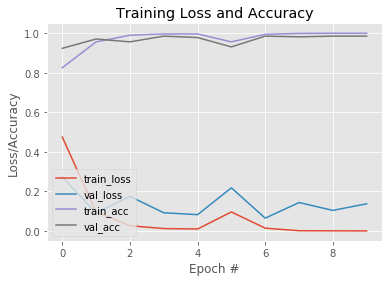

In [33]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [35]:
model.evaluate(test_dataset)

  ...
    to  
  ['...']
9/9 [==============================] - 9s 989ms/step - loss: 0.1373 - accuracy: 0.9855


[0.1372686057657862, 0.98545456]

In [38]:
model.save('modelFace1.h5')